In [29]:
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

from IPython.display import Image, display as idisplay
import PIL
from PIL import Image
import cv2


def display(img, resize = None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if resize:
        img = cv2.resize(img, resize)
    idisplay(Image.fromarray(img))
    print('\n--------------------------\n')
    

def xywh_to_ltrb(xywh):
    x, y, w, h = xywh
    return [x - w/2, y - h/2, x + w/2, y + h/2 ]

def ltwh_to_xywh(ltwh):
    l, t, w, h = ltwh
    return [l + w/2, t + h/2, w, h ]

def ltrb_to_xywh(ltrb):
    l, t, r, b = ltrb
    w = r - l
    h = b - t
    return [l + w/2, t + h/2, w, h]


def objs_to_txt(objs):
    lines = [' '.join([str(e) for e in obj]) for obj in objs]
    txt = '\n'.join(lines)
    return txt


def viz(frame, bboxes, inplace = False, _display = True):
    if not inplace:
        frame = frame.copy()
    for bbox in bboxes:
        cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])),
                          (int(bbox[2]), int(bbox[3])), color, 2)
        
    if _display:
        display(frame)
    return frame


def longest_resize(img, size):
    h, w = img.shape[:2]
    r = size / max(h, w)
    new_h, new_w = int(r * h), int(r * w)
    img = cv2.resize(img, (new_w, new_h))
    return img
    
def viz_yolo_label(frame_path, label_path, _display = True, max_size = 320):
    frame = cv2.imread(frame_path)
    frame = longest_resize(frame, max_size)
    frame = np.zeros_like(frame)
    frame_h, frame_w = frame.shape[:2]
    objs = []
    with open(label_path, 'r') as f:
        label = f.read()
        lines = [line for line in label.split('\n') if line]
        for line in lines:
            cls, x, y, w, h = line.split()
            cls = int(cls)
            # rescale frome [0, 1] to frame coordinate
            x = float(x) * frame_w
            y = float(y) * frame_h
            w = float(w) * frame_w
            h = float(h) * frame_h
            l, t, r, b = xywh_to_ltrb([x, y, w, h])
            objs.append((l, t, r, b, cls))

    # l, t, r, b, cls
    for obj in objs:
        cv2.rectangle(frame, (int(obj[0]), int(obj[1])),
                          (int(obj[2]), int(obj[3])), (0, 0, 255), 2)
#         cv2.putText(frame, str(obj[4]), (int(obj[0]), int(obj[1] - 1)), 0,
#                     0.75, (0, 0, 255), 2)
    if _display:
        display(frame)
    return frame

In [20]:
# NUMBER OF FAILS: 5
# FAILS: ['1511@1031853445.png', '25323@1743461841.png', '33581@357843412.png', '50203@643148078.png', '52509@775490405.png']

In [21]:
VIZ_DIR = '/home/dangnh36/projects/.comp/rsna/yolov5/runs/detect/exp/viz/'
LABEL_DIR = '/home/dangnh36/projects/.comp/rsna/yolov5/runs/detect/exp/labels/'
LABEL_MAX_DIR = '/home/dangnh36/projects/.comp/rsna/yolov5/runs/detect/exp/labels_max/'

In [11]:
def read_det(txt_path):
    det = np.loadtxt(txt_path, dtype = np.float32, delimiter = ' ').reshape(-1, 5)
    return det

  0%|                                                               | 0/54701 [00:00<?, ?it/s]

50410@501086456.txt 0.17282344 0.2036571


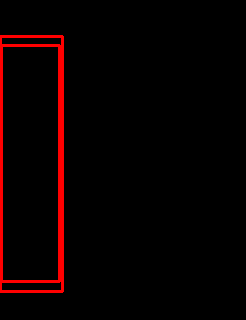

  0%|▏                                                  | 206/54701 [00:00<00:46, 1159.51it/s]


--------------------------

58535@824809615.txt 0.08540732 0.107622266


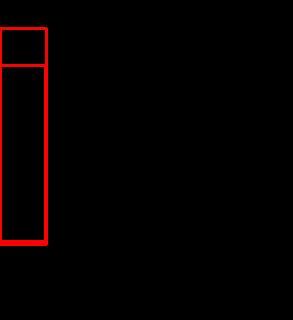


--------------------------

59101@1284818997.txt 0.13455974 0.15735616


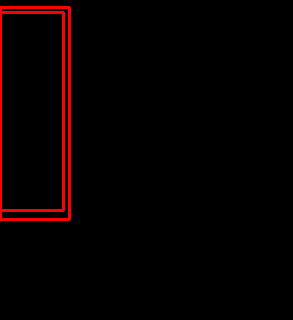

  1%|▌                                                   | 614/54701 [00:00<01:16, 704.45it/s]


--------------------------

3768@490308031.txt 0.11458422 0.13857992


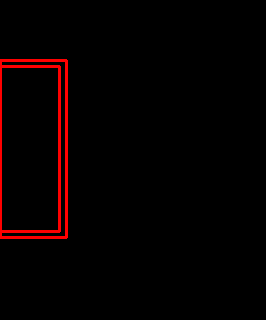

  1%|▋                                                   | 779/54701 [00:01<01:16, 707.49it/s]


--------------------------



  3%|█▌                                                | 1668/54701 [00:01<00:36, 1468.44it/s]

9098@13083291.txt 0.17206076 0.2092544


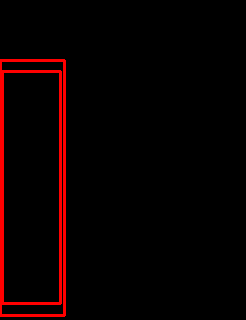

  3%|█▋                                                | 1855/54701 [00:01<00:41, 1274.63it/s]


--------------------------



  4%|██                                                | 2307/54701 [00:02<00:31, 1670.01it/s]

46832@1865455893.txt 0.18488528 0.22328982


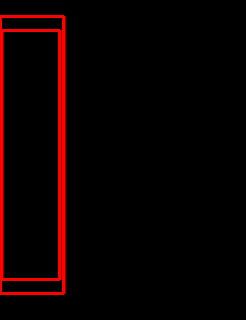


--------------------------



  5%|██▎                                               | 2500/54701 [00:02<00:40, 1290.40it/s]

30453@839841300.txt 0.3465325 0.42946696


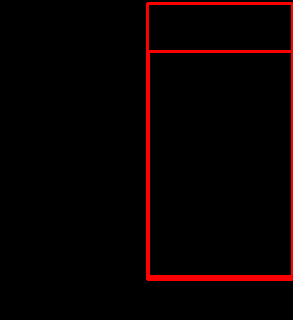

  5%|██▋                                                | 2842/54701 [00:02<00:56, 921.67it/s]


--------------------------



  6%|██▊                                               | 3122/54701 [00:03<00:50, 1024.66it/s]

46706@409871942.txt 0.14262201 0.17511708


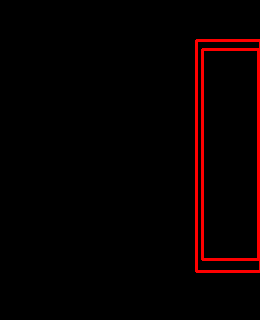

  6%|███                                                | 3254/54701 [00:03<01:08, 748.79it/s]


--------------------------

15503@882855657.txt 0.10897532 0.13089333


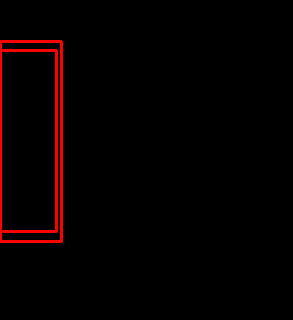

  7%|███▎                                               | 3609/54701 [00:03<00:59, 860.95it/s]


--------------------------

33581@1586149541.txt 0.072717756 0.08248724


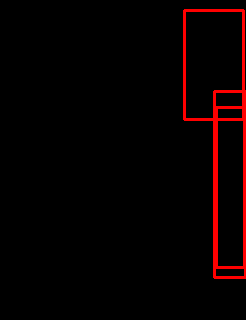

  7%|███▍                                               | 3742/54701 [00:04<01:08, 740.72it/s]


--------------------------

15361@355915618.txt 0.1310782 0.15800469


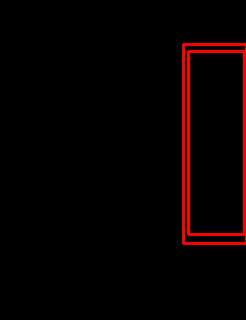

  7%|███▊                                               | 4067/54701 [00:04<00:53, 951.41it/s]


--------------------------

45821@688600120.txt 0.33371648 0.43585825


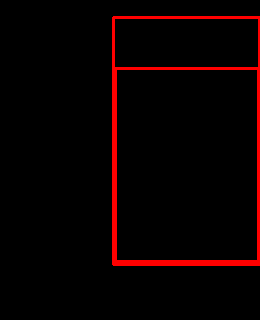


--------------------------

31709@1529272926.txt 0.11629195 0.13490319


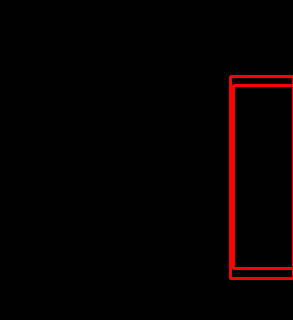

  8%|███▉                                               | 4198/54701 [00:04<01:35, 526.69it/s]


--------------------------

53469@1426430769.txt 0.14213713 0.17658788


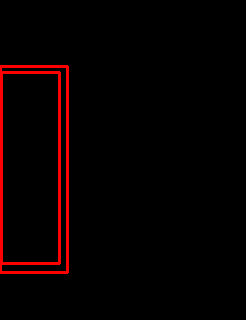

  8%|████                                               | 4296/54701 [00:05<01:35, 525.83it/s]


--------------------------



 10%|████▊                                             | 5253/54701 [00:05<00:31, 1558.47it/s]

47099@1931587452.txt 0.2798731 0.35484537


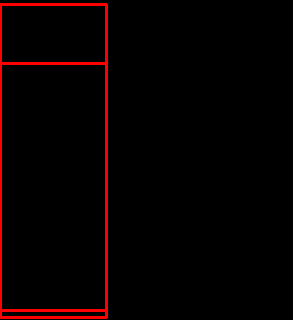

 10%|█████                                              | 5456/54701 [00:05<00:50, 969.10it/s]


--------------------------

32292@924198868.txt 0.14131655 0.17314707


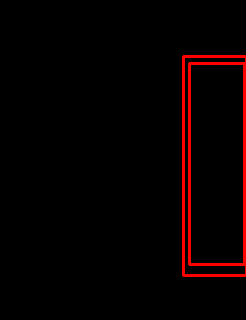

 10%|█████▏                                             | 5613/54701 [00:06<00:53, 925.49it/s]


--------------------------



 11%|█████▋                                            | 6160/54701 [00:06<00:31, 1529.94it/s]

46373@1337978612.txt 0.14929143 0.18522595


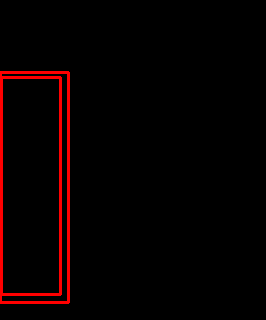

 12%|█████▊                                            | 6367/54701 [00:06<00:33, 1460.21it/s]


--------------------------



 12%|█████▉                                            | 6551/54701 [00:06<00:34, 1384.45it/s]

4659@1589743222.txt 0.15043879 0.17585717


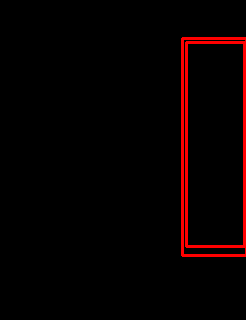


--------------------------

25578@631616205.txt 0.24352095 0.30533475


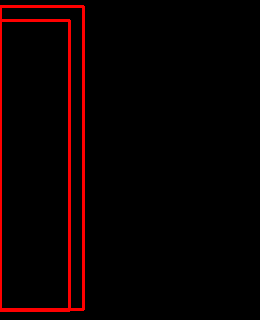

 12%|██████▎                                            | 6716/54701 [00:07<00:56, 845.80it/s]


--------------------------



 14%|██████▉                                           | 7637/54701 [00:07<00:31, 1476.11it/s]

4202@1775490159.txt 0.42452982 0.50915015


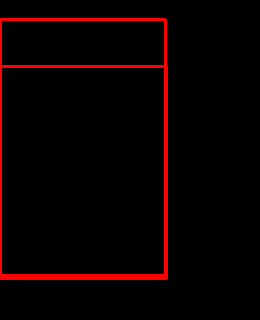

 15%|███████▎                                          | 7988/54701 [00:08<00:42, 1103.23it/s]


--------------------------



 15%|███████▋                                          | 8421/54701 [00:08<00:30, 1526.67it/s]

8393@740531930.txt 0.16461228 0.19347565


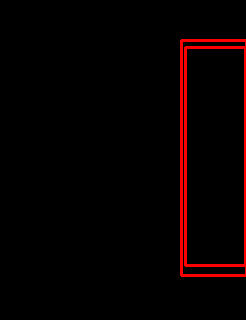


--------------------------



 19%|█████████▏                                       | 10274/54701 [00:09<00:18, 2350.36it/s]

59392@1845928419.txt 0.35369614 0.44798443


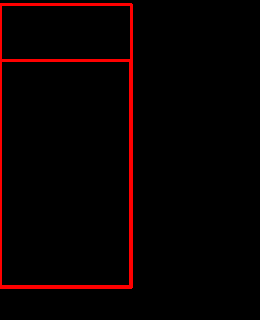

 19%|█████████▍                                       | 10516/54701 [00:09<00:34, 1291.01it/s]


--------------------------

20657@1562439439.txt 0.16327433 0.19975309


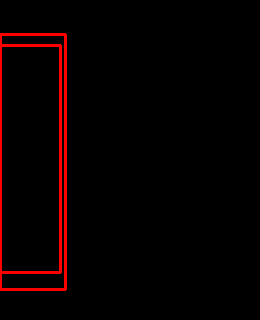

 20%|█████████▊                                       | 10912/54701 [00:10<00:35, 1241.41it/s]


--------------------------

17111@1809890037.txt 0.089442 0.11853542


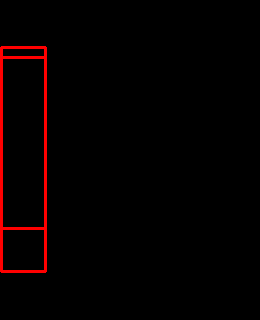


--------------------------

28081@1571542936.txt 0.15820733 0.19186269


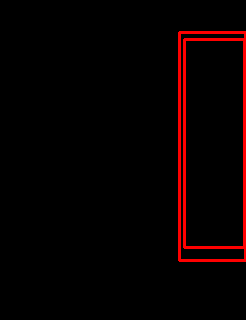

 20%|██████████▏                                       | 11082/54701 [00:10<00:49, 878.41it/s]


--------------------------



 25%|████████████▎                                    | 13783/54701 [00:11<00:24, 1701.91it/s]

10884@380407567.txt 0.351238 0.5159253


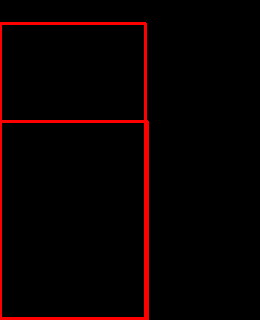

 26%|████████████▋                                    | 14231/54701 [00:12<00:30, 1344.88it/s]


--------------------------



 26%|████████████▉                                    | 14444/54701 [00:12<00:26, 1509.69it/s]

37852@1127783615.txt 0.18426588 0.2147011


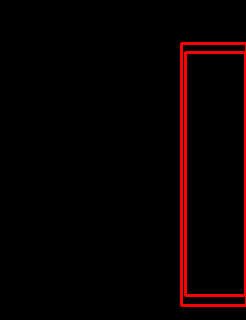

 27%|█████████████                                    | 14633/54701 [00:12<00:30, 1293.43it/s]


--------------------------



 28%|█████████████▌                                   | 15097/54701 [00:12<00:23, 1701.71it/s]

19081@960131174.txt 0.43338186 0.5340133


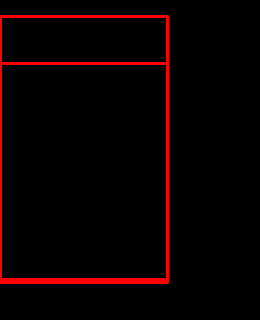

 28%|█████████████▋                                   | 15295/54701 [00:13<00:37, 1045.38it/s]


--------------------------



 29%|██████████████▎                                  | 15979/54701 [00:13<00:27, 1415.00it/s]

41613@1233290613.txt 0.18310109 0.21000278


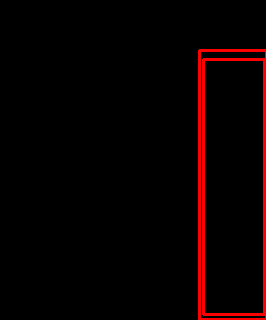

 30%|██████████████▍                                  | 16142/54701 [00:13<00:34, 1126.72it/s]


--------------------------

62608@1233738688.txt 0.174025 0.20698155


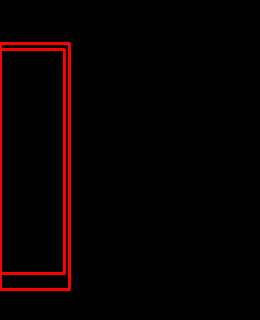

 30%|██████████████▊                                  | 16469/54701 [00:14<00:37, 1010.23it/s]


--------------------------

5509@1817551939.txt 0.10569059 0.13517635


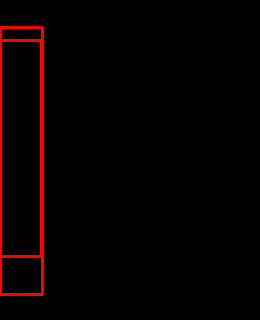

 30%|███████████████▏                                  | 16627/54701 [00:14<00:43, 871.64it/s]


--------------------------

2364@1492393193.txt 0.2623705 0.32927924


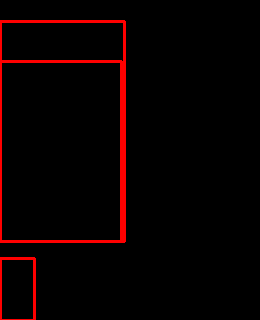

 31%|███████████████▎                                 | 17066/54701 [00:14<00:35, 1070.30it/s]


--------------------------

24644@636410662.txt 0.0346814 0.6045075


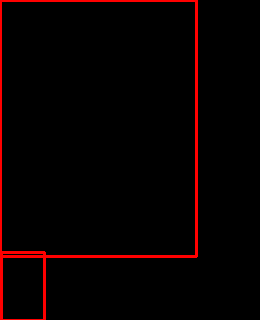

 32%|███████████████▌                                 | 17432/54701 [00:15<00:35, 1047.30it/s]


--------------------------



 34%|████████████████▋                                | 18696/54701 [00:15<00:17, 2081.82it/s]

44339@198290839.txt 0.3399906 0.42419478


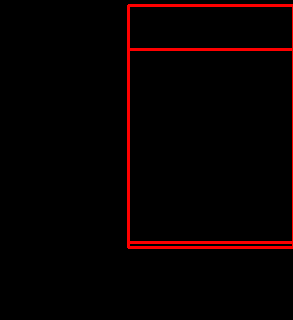

 35%|████████████████▉                                | 18926/54701 [00:16<00:32, 1098.78it/s]


--------------------------

34736@74538260.txt 0.11968468 0.14285912


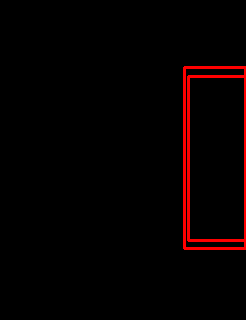


--------------------------



 35%|█████████████████▎                               | 19293/54701 [00:16<00:30, 1177.39it/s]

23388@557046384.txt 0.102362216 0.11989354


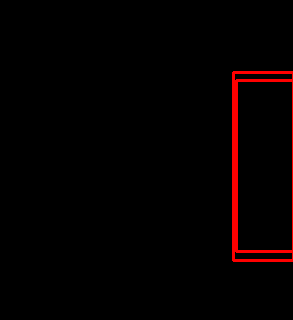

 36%|█████████████████▊                               | 19900/54701 [00:17<00:27, 1271.12it/s]


--------------------------



 37%|██████████████████                               | 20232/54701 [00:17<00:26, 1278.43it/s]

64016@697957354.txt 0.025280245 0.3151729


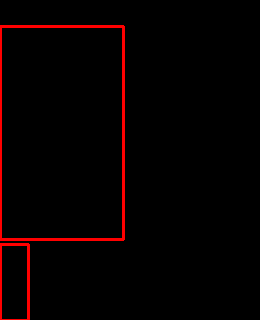


--------------------------

15173@753348215.txt 0.34698904 0.4342995


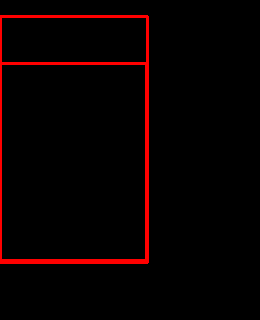

 38%|██████████████████▊                               | 20563/54701 [00:18<00:48, 707.21it/s]


--------------------------



 38%|██████████████████▉                               | 20703/54701 [00:18<00:42, 807.72it/s]

43368@1424841808.txt 0.18657516 0.21838231


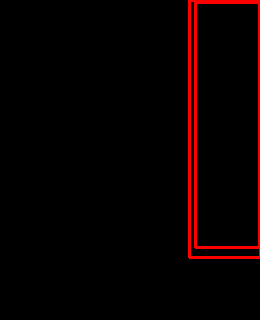

 39%|███████████████████▎                              | 21108/54701 [00:18<00:35, 953.84it/s]


--------------------------



 39%|███████████████████                              | 21335/54701 [00:18<00:28, 1177.57it/s]

18867@801646711.txt 0.1622726 0.18791828


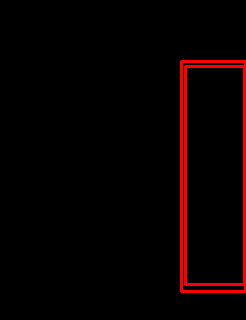


--------------------------

51028@1007453929.txt 0.14643346 0.17642617


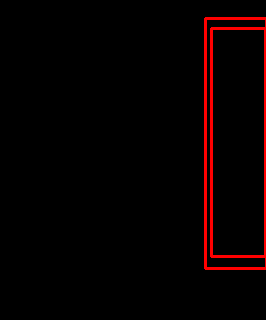

 39%|███████████████████▋                              | 21510/54701 [00:19<00:33, 977.53it/s]


--------------------------



 42%|████████████████████▌                            | 22891/54701 [00:19<00:16, 1968.56it/s]

64534@792499698.txt 0.03960302 0.3050673


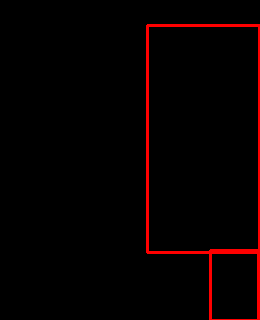


--------------------------

55933@682489428.txt 0.41807464 0.47716197


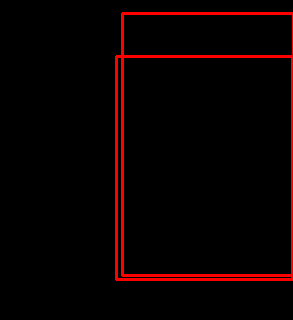

 43%|█████████████████████▎                            | 23370/54701 [00:20<00:34, 911.67it/s]


--------------------------



 43%|█████████████████████                            | 23560/54701 [00:20<00:29, 1047.22it/s]

18026@1198948736.txt 0.16821364 0.20183565


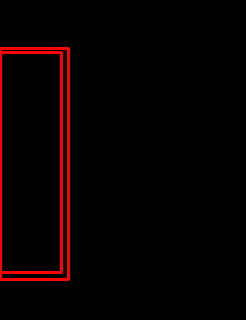

 43%|█████████████████████▎                           | 23774/54701 [00:20<00:27, 1107.37it/s]


--------------------------

63831@342819133.txt 0.4673948 0.5816297


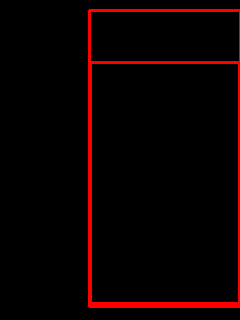

 44%|█████████████████████▌                           | 24090/54701 [00:21<00:28, 1057.64it/s]


--------------------------

51824@56918185.txt 0.31934342 0.39779082


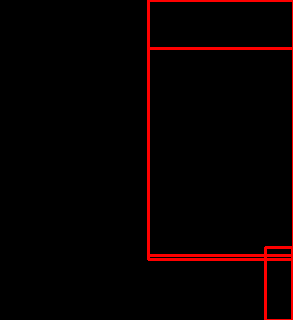


--------------------------



 45%|██████████████████████▌                           | 24671/54701 [00:22<00:44, 667.48it/s]

48033@1430529859.txt 0.2276989 0.29800007


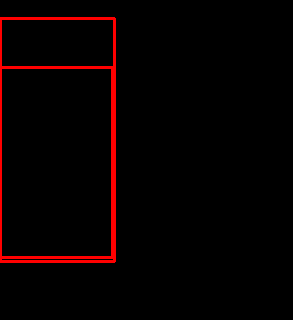

 46%|██████████████████████▊                           | 24967/54701 [00:23<00:42, 699.01it/s]


--------------------------



 46%|██████████████████████▉                           | 25080/54701 [00:23<00:38, 766.60it/s]

10921@1716439630.txt 0.30219483 0.37618533


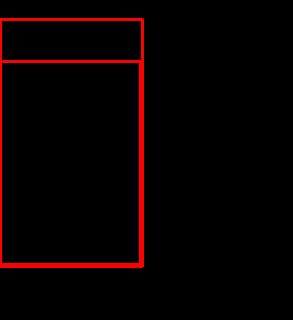

 46%|███████████████████████▏                          | 25387/54701 [00:23<00:43, 680.05it/s]


--------------------------

54869@1495473005.txt 0.51298326 0.63813484


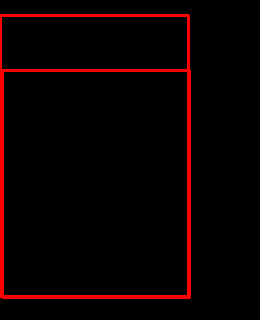

 47%|███████████████████████▎                          | 25505/54701 [00:24<00:52, 555.45it/s]


--------------------------

56919@794674905.txt 0.14448068 0.17497465


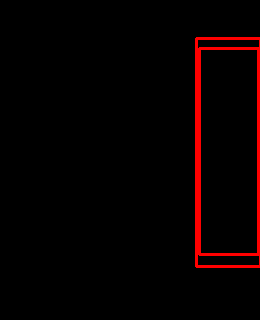

 47%|███████████████████████▌                          | 25740/54701 [00:24<00:48, 593.48it/s]


--------------------------



 49%|███████████████████████▊                         | 26629/54701 [00:25<00:17, 1571.02it/s]

8698@1809761369.txt 0.14646879 0.17182839


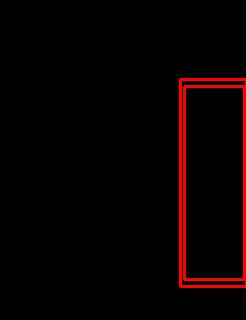

 49%|████████████████████████                         | 26812/54701 [00:25<00:21, 1274.21it/s]


--------------------------



 50%|████████████████████████▋                        | 27565/54701 [00:25<00:17, 1515.35it/s]

2738@1154819623.txt 0.09827728 0.12900183


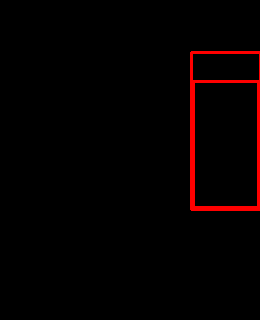

 51%|████████████████████████▊                        | 27730/54701 [00:26<00:25, 1059.89it/s]


--------------------------



 51%|████████████████████████▉                        | 27863/54701 [00:26<00:25, 1053.67it/s]

489@775609436.txt 0.22793384 0.26617417


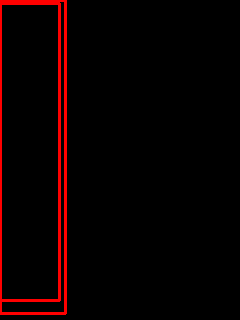

 51%|█████████████████████████                        | 27987/54701 [00:26<00:25, 1036.04it/s]


--------------------------

42963@1997906022.txt 0.38279504 0.44524446


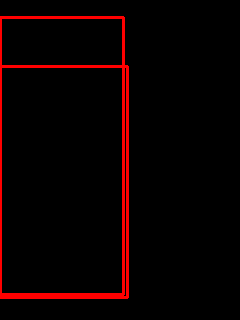

 52%|█████████████████████████▍                       | 28438/54701 [00:26<00:19, 1320.79it/s]


--------------------------

17960@778649155.txt 0.16793701 0.19623247


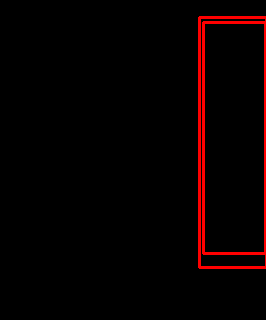

 53%|█████████████████████████▊                       | 28754/54701 [00:26<00:20, 1235.94it/s]


--------------------------

53469@1086219707.txt 0.17617372 0.2261922


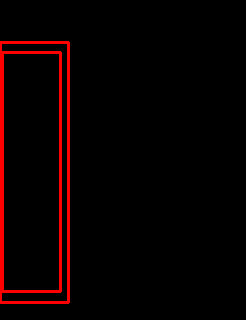

 53%|██████████████████████████                       | 29078/54701 [00:27<00:22, 1117.46it/s]


--------------------------



 54%|██████████████████████████▍                      | 29469/54701 [00:27<00:17, 1474.68it/s]

54879@867326500.txt 0.560926 0.6956755


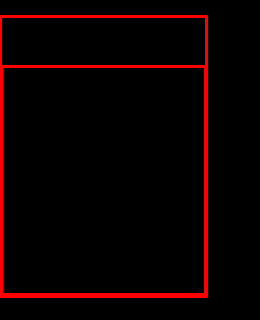


--------------------------

2482@1890232525.txt 0.30566776 0.38027987


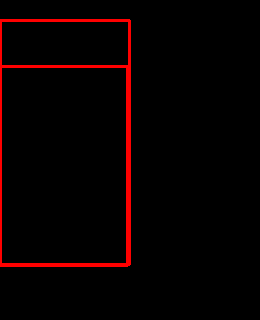

 54%|███████████████████████████                       | 29637/54701 [00:28<00:36, 680.60it/s]


--------------------------

65471@1600898071.txt 0.16241086 0.19427297


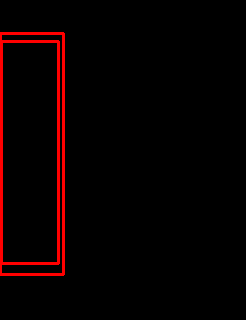

 55%|███████████████████████████▎                      | 29843/54701 [00:28<00:32, 761.72it/s]


--------------------------

43368@51197400.txt 0.18592314 0.21921472


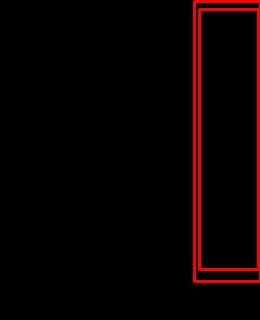

 55%|███████████████████████████▍                      | 29981/54701 [00:28<00:33, 727.53it/s]


--------------------------

44122@2119016582.txt 0.39550272 0.44311082


 55%|██████████████████████████▉                      | 30048/54701 [00:29<00:23, 1035.91it/s]


KeyboardInterrupt: 

In [31]:
names = os.listdir(LABEL_DIR)

fails = []
for name in tqdm(names):
    label_path = os.path.join(LABEL_DIR, name)
    max_label_path = os.path.join(LABEL_MAX_DIR, name)
    
    label = read_det(label_path)
    max_label =  read_det(max_label_path)
    assert len(max_label) == 1
    max_area = max_label[0, -2] * max_label[0, -1]
    areas = label[:, -2] * label[:, -1]
    max_area_2 = np.max(areas)
    if max_area != max_area_2:
        print(name, max_area, max_area_2)
        fails.append(name)
        viz_yolo_label(os.path.join(VIZ_DIR, name.replace('.txt', '.png')), label_path, _display = True)
        

In [ ]:
# difficult cases: 33581@1586149541.txt, 